In [1]:
import os, sys, re, io, glob, shutil
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ColorConverter

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

import ipywidgets as widgets

Atoms before removal:
Index: 0, Symbol: C
Index: 1, Symbol: C
Index: 2, Symbol: H
Index: 3, Symbol: H
Index: 4, Symbol: H
Index: 5, Symbol: H
Index: 6, Symbol: H
Index: 7, Symbol: H

Atoms after removal:
Index: 0, Symbol: C
Index: 1, Symbol: C
Index: 2, Symbol: H
Index: 3, Symbol: H
Index: 4, Symbol: H
Index: 5, Symbol: H
Index: 6, Symbol: H


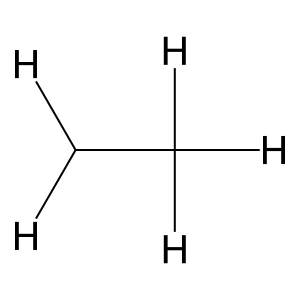

In [2]:
# Step 1: Create ethane molecule
ethane = Chem.MolFromSmiles("CC")

# Step 2: Convert implicit hydrogens to explicit
ethane = Chem.AddHs(ethane)

# Step 3: Print atoms before removal
print("Atoms before removal:")
for atom in ethane.GetAtoms():
    print(f"Index: {atom.GetIdx()}, Symbol: {atom.GetSymbol()}")

# Step 4: Remove the lowest index hydrogen
ethane_rw = Chem.RWMol(ethane)  # Convert to RWMol for editing
for atom in ethane_rw.GetAtoms():
    if atom.GetSymbol() == "H":
        # query the carbon neighbors
        # neighbors = [n.GetSymbol() for n in atom.GetNeighbors()]
        # ethane_rw.RemoveBond(
        #     atom.GetIdx(), atom.GetNeighbors()[0].GetIdx()
        # )  # Remove bond to first carbon
        ethane_rw.RemoveAtom(atom.GetIdx())  # Remove first H found
        break  # Stop after removing one hydrogen

# Step 5: Convert back to Mol
ethane_modified = ethane_rw.GetMol()

# Step 6: Print atoms after removal
print("\nAtoms after removal:")
for atom in ethane_modified.GetAtoms():
    print(f"Index: {atom.GetIdx()}, Symbol: {atom.GetSymbol()}")

# Step 7: Display the molecule
display(Chem.Draw.MolToImage(ethane_modified))

sd_writer = Chem.SDWriter("test.sdf")
sd_writer.write(ethane_rw.GetMol())

In [3]:
def draw_molecule(mol):
    drawer = Chem.Draw.rdMolDraw2D.MolDraw2DCairo(300, 300)
    drawer.drawOptions().comicMode = True
    drawer.drawOptions().addAtomIndices = True
    drawer.drawOptions().continuousHighlight = True
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    img = drawer.GetDrawingText()
    display(Image.open(io.BytesIO(img)))

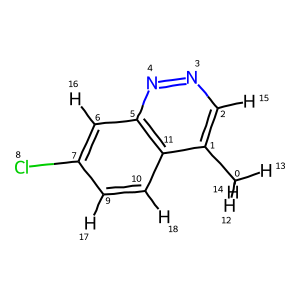

In [4]:
test = Chem.SDMolSupplier("test_example.sdf", removeHs=False)
mol = test[0]
# display the molecule with index
draw_molecule(mol)

sd_writer = Chem.SDWriter("test.sdf")
mol.SetProp("_Name", "test")
sd_writer.SetKekulize(True)
sd_writer.write(mol)
sd_writer.close()

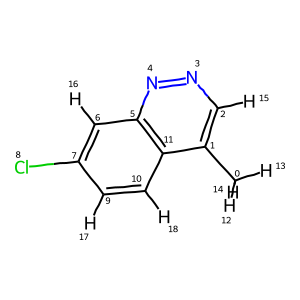

In [5]:
test = Chem.SDMolSupplier("test.sdf", removeHs=False)
mol = test[0]
# display the molecule with index
draw_molecule(mol)

Number of bonds: 20
Number of bonds: 19


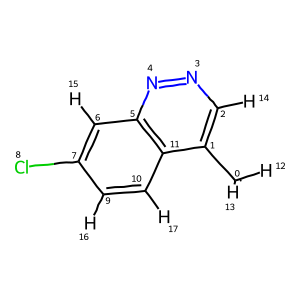

In [6]:
# get the number of bonds
print("Number of bonds:", mol.GetNumBonds())
# remove atom with index 12
mol_rw = Chem.RWMol(mol)
atom_index = 12
neighbors_carbon = mol_rw.GetAtomWithIdx(atom_index).GetNeighbors()[0].GetIdx()
for atom in mol_rw.GetAtoms():
    if atom.GetIdx() == 12:
        mol_rw.RemoveBond(atom.GetIdx(), atom.GetNeighbors()[0].GetIdx())
        mol_rw.RemoveAtom(atom.GetIdx())

        mol_rw.GetAtomWithIdx(neighbors_carbon).SetNumRadicalElectrons(1)
        break
print("Number of bonds:", mol_rw.GetNumBonds())

mol_rw.UpdatePropertyCache()
draw_molecule(mol_rw)

sd_writer = Chem.SDWriter("test.sdf")
sd_writer.SetKekulize(False)
sd_writer.write(mol_rw.GetMol())
sd_writer.close()